In [10]:
import numpy as np
import csv
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.size'] = 18
ms = 12
lw = 3

fcloud = ['M3','M4','M8']
marker = ['x','d','.']

In [11]:
def zboldyrev(p):
    return (p/9.+1.-(1./3.)**(p/3.))

def zshe(p):
    return (p/9.+2.-2.*(2./3.)**(p/3.))

In [12]:
ddir = "/Users/roxanachira/Dropbox/chira2018/pics/data/"

header = True
ref,rlabel,p,zeta,ezeta,z,ez = np.array([]),np.array([]),np.array([]),np.array([]),np.array([]),np.array([]),np.array([])

ifile = glob(('%scomp_obs_vsf.csv' % ddir))[0]
with open(ifile,'r') as fin:
    tmp = csv.reader(fin, delimiter=',')
    for row in tmp:
        if(header==True): header = False
        else: 
            ref    = np.append(ref,row[0])
            rlabel = np.append(rlabel,row[3])
            p      = np.append(p,int(row[4]))
            zeta   = np.append(zeta,float(row[5]))
            ezeta  = np.append(ezeta,float(row[6]))
            z      = np.append(z,float(row[7]))
            ez     = np.append(ez,float(row[8]))

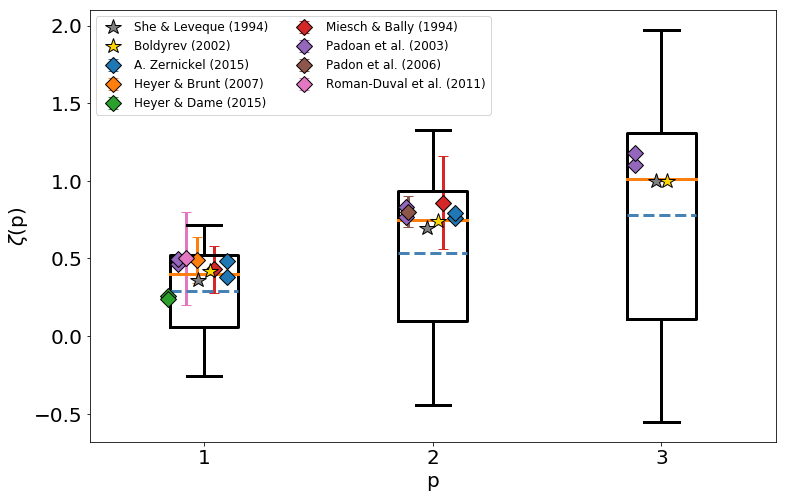

In [13]:
zeta1,zeta2,zeta3 = np.array([]),np.array([]),np.array([])
for icloud in range(len(fcloud)):
    cloud = fcloud[icloud]
    ifile = glob(('%s/vsfhr04/*%s*' % (ddir,cloud)))[0]
    tzeta1,tzeta2,tzeta3 = np.loadtxt(ifile,skiprows=1,usecols=(1,2,3),unpack=True)
    zeta1,zeta2,zeta3 = np.append(zeta1,tzeta1),np.append(zeta2,tzeta2),np.append(zeta3,tzeta3)
    
data = [zeta1,zeta2,zeta3]

meanprops   = dict(linestyle='--', linewidth=lw,color='steelblue')
medianprops = dict(linestyle='-', linewidth=lw)
boxprops    = dict(linestyle='-', linewidth=lw)
whiskprops  = boxprops
capprops    = boxprops

plt.figure(figsize=(11,7))
plt.boxplot(data,zorder=1,showmeans=True,meanline=True,meanprops=meanprops,medianprops=medianprops,boxprops=boxprops,whiskerprops=whiskprops,capprops=capprops)

uref   = np.unique(ref)
offset = (np.random.random_sample(len(uref))-0.5)*0.325
for iref in range(len(uref)):
    h = np.where(uref[iref] == ref)[0]
    plt.errorbar(p[h]+offset[iref],zeta[h],ezeta[h],zorder=1,capsize=5,label=uref[iref],marker='D',markeredgecolor='black',ms=ms,lw=lw,ls='')
    
for ip in range(1,4):
    if(ip == 1): 
        label1 = 'She & Leveque (1994)'
        label2 = 'Boldyrev (2002)'
    else:
        label1 = ''
        label2 = ''
    plt.plot(ip-2.5e-2,zshe(ip),marker='*',ms=ms+4,ls='',color='grey',markeredgecolor='black',label=label1)
    plt.plot(ip+2.5e-2,zboldyrev(ip),marker='*',ms=ms+4,ls='',color='gold',markeredgecolor='black',label=label2)

plt.xlabel('p')
plt.ylabel('$\zeta$(p)')
plt.legend(fontsize=16,ncol=2)


plt.tight_layout(pad=0.5)
plt.savefig('compare_observations.pdf')